In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [251]:
df = pd.read_csv('metrics/iris_metrics.csv')

In [252]:
df.fillna(0, inplace=True) 

df['accuracy'] = pd.to_numeric(df['accuracy'], errors='coerce')
df['num_slices'] = pd.to_numeric(df['num_slices'], errors='coerce')
df['num_dimensions'] = pd.to_numeric(df['num_dimensions'], errors='coerce')
df['time'] = pd.to_datetime(df['time'])

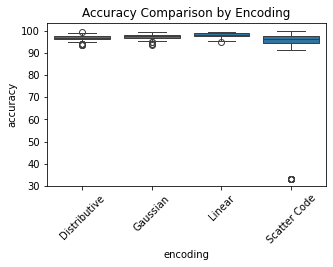

In [253]:
# Comparing Accuracy by Encoding

plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='encoding', y='accuracy')
plt.title('Accuracy Comparison by Encoding')
plt.xticks(rotation=45)
plt.show()

In [254]:
# # Comparing Models by Accuracy

# plt.figure(figsize=(5,3))
# sns.barplot(data=df, x='model', y='accuracy', ci=None)
# plt.title('Accuracy Comparison by Model')
# plt.show()

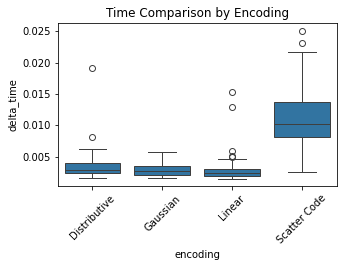

In [255]:
# Comparing Time by Encoding

plt.figure(figsize=(5,3))
sns.boxplot(data=df, x='encoding', y='delta_time')
plt.title('Time Comparison by Encoding')
plt.xticks(rotation=45)
plt.show()

In [256]:
# # Comparing Number of Slices and Dimensions

# plt.figure(figsize=(5,3))
# sns.scatterplot(data=df, x='num_slices', y='num_dimensions', hue='accuracy', size='accuracy', sizes=(40, 400))
# plt.title('Number of Slices vs Number of Dimensions')
# plt.show()

In [257]:
# # Comparing Time and Accuracy

# plt.figure(figsize=(5,3))
# sns.scatterplot(data=df, x='delta_time', y='accuracy')
# plt.title('Time vs Accuracy')
# plt.show()

In [258]:
# # Heatmap for Correlations

# correlation_matrix = df[['accuracy', 'num_slices', 'num_dimensions']].corr()
# plt.figure(figsize=(4, 3))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap')
# plt.show()

In [259]:
# Custom Metrics

# Calculate the mean accuracy per encoding
encoding_accuracy = df.groupby('encoding', as_index=False)['accuracy'].agg({'points':['mean','std']})
print(encoding_accuracy)

       encoding     points           
                      mean        std
0  Distributive  96.591638   1.201582
1      Gaussian  97.259052   1.201901
2        Linear  97.781983   0.904858
3  Scatter Code  85.620259  24.017625


/var/folders/km/rd804c352zqbn7m1cxjbyd5c0000gn/T/ipykernel_40929/1024270063.py:4: FutureWarning: Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.
  encoding_accuracy = df.groupby('encoding', as_index=False)['accuracy'].agg({'points':['mean','std']})


/var/folders/km/rd804c352zqbn7m1cxjbyd5c0000gn/T/ipykernel_40929/4076891390.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='model', y='accuracy', hue='encoding', ci=None)


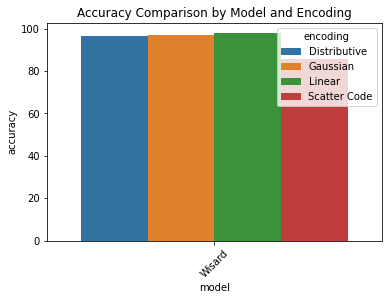

In [260]:
# Compare models by accuracy while also visualizing the encoding

# Grouped Bar Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='model', y='accuracy', hue='encoding', ci=None)
plt.title('Accuracy Comparison by Model and Encoding')
plt.xticks(rotation=45)
plt.show()

In [261]:
# # Compare models by accuracy while also visualizing the encoding

# # Create a FacetGrid to compare models by accuracy for each encoding
# g = sns.FacetGrid(df, col='encoding', col_wrap=4, height=5)
# g.map(sns.barplot, 'model', 'accuracy', ci=None)
# g.set_titles('{col_name}')
# g.set_axis_labels('Model', 'Accuracy')
# g.set_xticklabels(rotation=45)
# plt.tight_layout()
# plt.show()

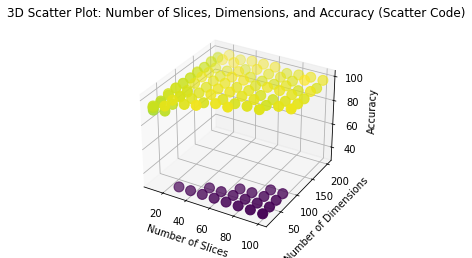

In [262]:
# Scatter Code number of slices x dimensions x accuracy

# Filter the DataFrame for 'Scatter Code' encoding
scatter_code_df = df[df['encoding'] == 'Scatter Code']

# Create a 3D scatter plot
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(
    scatter_code_df['num_slices'],
    scatter_code_df['num_dimensions'],
    scatter_code_df['accuracy'],
    c=scatter_code_df['accuracy'], cmap='viridis', s=100
)

# Labels and title
ax.set_xlabel('Number of Slices')
ax.set_ylabel('Number of Dimensions')
ax.set_zlabel('Accuracy')
ax.set_title('3D Scatter Plot: Number of Slices, Dimensions, and Accuracy (Scatter Code)')

plt.show()

/var/folders/km/rd804c352zqbn7m1cxjbyd5c0000gn/T/ipykernel_40929/4147517489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_code_df['slices_and_dimensions'] = scatter_code_df.apply(


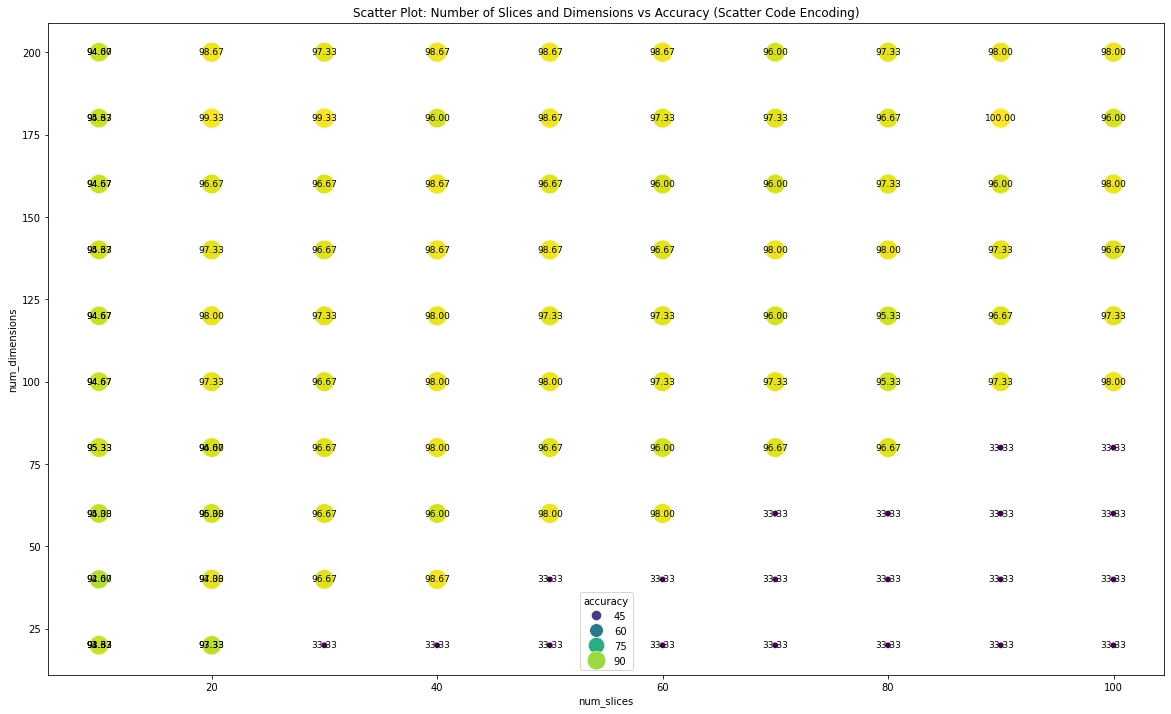

In [263]:
# Filter the DataFrame for 'Scatter Code' encoding
scatter_code_df = df[df['encoding'] == 'Scatter Code']

# Create a combined column with tuples (num_slices, num_dimensions) as a label
scatter_code_df['slices_and_dimensions'] = scatter_code_df.apply(
    lambda row: f"({row['num_slices']}, {row['num_dimensions']})", axis=1
)

# Plot the data with 'num_slices' and 'num_dimensions' as separate axes
plt.figure(figsize=(20,12))
ax = sns.scatterplot(
    data=scatter_code_df,
    x='num_slices',
    y='num_dimensions',
    hue='accuracy',  # Color by accuracy
    size='accuracy',
    sizes=(40, 400),
    palette='viridis',
    # legend=None
)

# Add labels for each point (accuracy value) at each point's position
for i in range(scatter_code_df.shape[0]):
    ax.text(
        scatter_code_df['num_slices'].iloc[i], 
        scatter_code_df['num_dimensions'].iloc[i], 
        f"{scatter_code_df['accuracy'].iloc[i]:.2f}", 
        color='black', fontsize=9, ha='center', va='center'
    )

# Set plot title and display
plt.title('Scatter Plot: Number of Slices and Dimensions vs Accuracy (Scatter Code Encoding)')
plt.show()
